### Script for identifying ETCs in Bukovsky regions  (1995–2017)
### in order to link with flood characteristics
### date created: 9 August 2021
### author: Erin Dougherty (doughert@ucar.edu)

In [1]:
import math 
import numpy as np
import pandas as pd
import matplotlib as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import netCDF4 as nc
from netCDF4 import Dataset, num2date
from datetime import datetime, date, timedelta
import glob
import xarray as xr

In [2]:
etc_path = '/glade/scratch/doughert/ERA5_cyclone_tracks/'

### import ETC tracks (1995–2017)

In [3]:
%%time
etcs_1990s = []

for filename in sorted(glob.glob(etc_path+'fi_19*')):
    print(filename)
    # get start date of each file
    file_st_date = pd.read_csv(filename, header=0).iloc[0].index.values[0][15:28]
    file_st_dt = pd.to_datetime(file_st_date, format='%Y%m%d_%H%M')
    
    # open full dataframe
    file_year = pd.read_csv(filename,sep='\s+\s+\s+\s+',  skiprows=[0,1,2,3], usecols=[0,1,2,3,4], names=['time', 'lon', 'lat', 'pmin', 'pcont'], 
                            engine='python')
    # turn each row into datetime objects
    file_year['time_dt'] = [file_st_dt + pd.Timedelta(file_year.time[i], unit='hours') for i in range(len(file_year))]
    file_year_sort = file_year.sort_values(by='time_dt', axis=0, ascending=True)
    etcs_1990s.append(file_year_sort)

/glade/scratch/doughert/ERA5_cyclone_tracks/fi_199501
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_199502
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_199503
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_199504
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_199505
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_199506
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_199507
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_199508
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_199509
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_199510
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_199511
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_199512
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_199601
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_199602
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_199603
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_199604
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_199605
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_199606
/glade/scratch/doughert/ERA5

In [4]:
etcs_1990s_ct = pd.concat(etcs_1990s, axis=0).reset_index()

In [5]:
etcs_1990s_ct = etcs_1990s_ct.drop('index', axis=1)

In [7]:
%%time
etcs_2000s = []

for filename in sorted(glob.glob(etc_path+'fi_200*')):
    print(filename)
    # get start date of each file
    file_st_date = pd.read_csv(filename, header=0).iloc[0].index.values[0][15:28]
    file_st_dt = pd.to_datetime(file_st_date, format='%Y%m%d_%H%M')
    
    # open full dataframe
    file_year = pd.read_csv(filename,sep='\s+\s+\s+\s+',  skiprows=[0,1,2,3], usecols=[0,1,2,3,4], names=['time', 'lon', 'lat', 'pmin', 'pcont'], 
                            engine='python')
    # turn each row into datetime objects
    file_year['time_dt'] = [file_st_dt + pd.Timedelta(file_year.time[i], unit='hours') for i in range(len(file_year))]
    file_year_sort = file_year.sort_values(by='time_dt', axis=0, ascending=True)
    etcs_2000s.append(file_year_sort)

/glade/scratch/doughert/ERA5_cyclone_tracks/fi_200001
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_200002
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_200003
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_200004
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_200005
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_200006
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_200007
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_200008
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_200009
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_200010
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_200011
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_200012
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_200101
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_200102
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_200103
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_200104
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_200105
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_200106
/glade/scratch/doughert/ERA5

In [8]:
etcs_2000s_ct = pd.concat(etcs_2000s, axis=0).reset_index()
etcs_2000s_ct = etcs_2000s_ct.drop('index', axis=1)

In [9]:
# print(etcs_2000s_ct)

In [10]:
%%time
etcs_2010s = []

for filename in sorted(glob.glob(etc_path+'fi_201*')):
    print(filename)
    # get start date of each file
    file_st_date = pd.read_csv(filename, header=0).iloc[0].index.values[0][15:28]
    file_st_dt = pd.to_datetime(file_st_date, format='%Y%m%d_%H%M')
    
    # open full dataframe
    file_year = pd.read_csv(filename,sep='\s+\s+\s+\s+',  skiprows=[0,1,2,3], usecols=[0,1,2,3,4], names=['time', 'lon', 'lat', 'pmin', 'pcont'], 
                            engine='python')
    # turn each row into datetime objects
    file_year['time_dt'] = [file_st_dt + pd.Timedelta(file_year.time[i], unit='hours') for i in range(len(file_year))]
    file_year_sort = file_year.sort_values(by='time_dt', axis=0, ascending=True)
    etcs_2010s.append(file_year_sort)

/glade/scratch/doughert/ERA5_cyclone_tracks/fi_201001
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_201002
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_201003
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_201004
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_201005
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_201006
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_201007
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_201008
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_201009
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_201010
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_201011
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_201012
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_201101
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_201102
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_201103
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_201104
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_201105
/glade/scratch/doughert/ERA5_cyclone_tracks/fi_201106
/glade/scratch/doughert/ERA5

In [11]:
etcs_2010s_ct = pd.concat(etcs_2010s, axis=0).reset_index()
etcs_2010s_ct = etcs_2010s_ct.drop('index', axis=1)

### remove rows with years over 2017

In [12]:
etcs_2010s_ct['year'] = [etcs_2010s_ct['time_dt'].iloc[i].year for i in range(len(etcs_2010s_ct))]

In [13]:
etcs_2010s_ct = etcs_2010s_ct[etcs_2010s_ct['year'] < 2018]

### concat all years together

In [14]:
etcs_all_years = pd.concat([etcs_1990s_ct, etcs_2000s_ct, etcs_2010s_ct]).reset_index()
etcs_all_years = etcs_all_years.drop(['index', 'time'],axis=1)

### remove points where lat <20 or > 50

In [15]:
etcs_all_years_nh = etcs_all_years[(etcs_all_years['lat']>20) & (etcs_all_years['lat']<51)].reset_index()
etcs_all_years_nh = etcs_all_years_nh.drop(['index'],axis=1)

#### remove points where lon <-120 or >-72

In [16]:
etcs_all_years_conus = etcs_all_years_nh[(etcs_all_years_nh['lon']>-124) & (etcs_all_years_nh['lon']<-72)].reset_index()
etcs_all_years_conus = etcs_all_years_conus.drop(['index'],axis=1)

#### import U.S. shapefile

In [18]:
from cartopy.io import shapereader
import geopandas as gp
from geopandas import GeoDataFrame

us_st = gp.GeoDataFrame.from_file(
    "/glade/work/doughert/flooddata/cb_2013_us_state_5m_2/cb_2013_us_state_5m.shp")
us_st.head()
print(len(us_st))
state = us_st['geometry'].values[0:56]

56


### import Bukovsky regions

In [19]:
from cartopy.io import shapereader
import geopandas as gp
from geopandas import GeoDataFrame

conus_reg = gp.GeoDataFrame.from_file( "/glade/work/doughert/asp/flood_storm_types/Bukovsky_conus_no_overlap/Bukovsky_conus_no_overlap.shp")
conus_reg.head()
print(len(conus_reg))

regions = conus_reg['geometry'].values

9


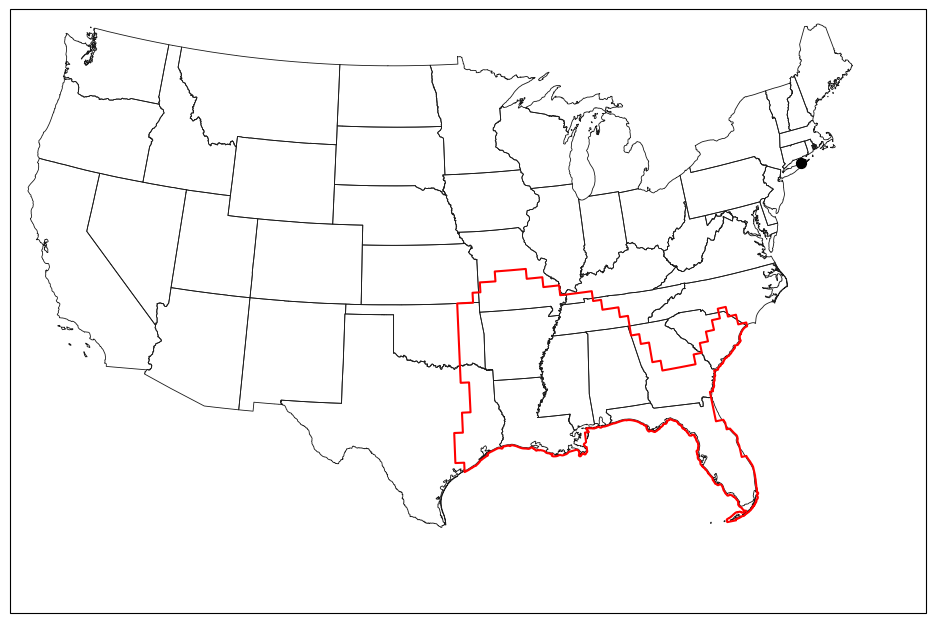

In [161]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.colors as colors

### plot accumulated rain rate as a countour plot
fig = plt.figure(figsize = (12,8), dpi = 100)

ax = plt.subplot(1, 1, 1,  projection=ccrs.LambertConformal(central_longitude=-100))
ax.add_geometries(state, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='0.1', linewidth = 0.6)
ax.add_geometries(regions[6:7], crs=ccrs.PlateCarree(), facecolor='none', edgecolor='r', linewidth = 1.5)
ax.set_extent([-120, -72, 21.5, 49], crs=ccrs.PlateCarree())
#ax.set_extent([-100, -80, 20, 38], crs=ccrs.PlateCarree())
plt.scatter(etcs_all_years_conus['lon'].iloc[8],etcs_all_years_conus['lat'].iloc[8], c='k', transform=ccrs.PlateCarree(), s=50, zorder=2)
plt.show()


### create list of regions

In [20]:
conus_reg['region_list'] = ['Pac_NW', 'Pac_SW', 'MountainW', 'Desert', 'GP', 'Praire', 'South', 'Lakes', 'East']

### turn pandas df into df

In [21]:
import geopandas as gpd

etcs_all_years_conus_geo = gpd.GeoDataFrame(
                        etcs_all_years_conus, geometry=gpd.points_from_xy(etcs_all_years_conus.lon, etcs_all_years_conus.lat))

### designate region as having ETC influence if center is in region

In [28]:
%%time
etc_region = []
etc_date = []
etc_pmin = []

for f in range(len(conus_reg)):
    for t in range(len(etcs_all_years_conus_geo)):
        if (conus_reg['geometry'].iloc[f].contains(etcs_all_years_conus_geo['geometry'].iloc[t])):
            etc_region.append(conus_reg['region_list'].iloc[f])
            etc_date.append(etcs_all_years_conus_geo['time_dt'].iloc[t])
            etc_pmin.append(etcs_all_years_conus_geo['pmin'].iloc[t])

CPU times: user 12min 2s, sys: 1.16 s, total: 12min 3s
Wall time: 12min 3s


In [29]:
print(len(etc_region))

284370


In [30]:
etc_region_df = pd.DataFrame({'Region':etc_region, 'Date':etc_date, 'Pmin':etc_pmin,})

### resample to daily resolution

In [31]:
etc_region_daily = etc_region_df.groupby('Region').resample('D', on='Date').mean().reset_index()

In [32]:
etc_region_daily_ct = etc_region_daily.groupby(['Date', 'Region']).count().reset_index()

#### export df of daily ETC occurence by region

In [168]:
etc_region_daily.to_csv('ETC_daily_counts_bukovsky_regions.csv')

In [33]:
print(etc_region_daily_ct)

            Date     Region  Pmin
0     1995-01-01       East     1
1     1995-01-02       East     1
2     1995-01-02  MountainW     1
3     1995-01-03       East     0
4     1995-01-03  MountainW     1
...          ...        ...   ...
75518 2017-12-30      Lakes     0
75519 2017-12-30  MountainW     1
75520 2017-12-30     Pac_NW     1
75521 2017-12-31     Desert     1
75522 2017-12-31      Lakes     1

[75523 rows x 3 columns]


#### separate pandas by region

In [34]:
etc_pacnw = etc_region_daily_ct[etc_region_daily_ct['Region']=='Pac_NW']
etc_pacsw = etc_region_daily_ct[etc_region_daily_ct['Region']=='Pac_SW']
etc_mnt = etc_region_daily_ct[etc_region_daily_ct['Region']=='MountainW']
etc_desert = etc_region_daily_ct[etc_region_daily_ct['Region']=='Desert']
etc_gp = etc_region_daily_ct[etc_region_daily_ct['Region']=='GP']
etc_prr = etc_region_daily_ct[etc_region_daily_ct['Region']=='Praire']
etc_south = etc_region_daily_ct[etc_region_daily_ct['Region']=='South']
etc_lakes = etc_region_daily_ct[etc_region_daily_ct['Region']=='Lakes']
etc_east = etc_region_daily_ct[etc_region_daily_ct['Region']=='East']

### make time series for each region

In [36]:
dates_since_1995 = pd.DataFrame({'Date':pd.date_range(start='1995-01-01', end='2017-12-31', freq='D')})

In [37]:
etc_pacnw_time = etc_pacnw.merge(dates_since_1995, how='right', on='Date')
etc_pacsw_time = etc_pacsw.merge(dates_since_1995, how='right', on='Date')
etc_mnt_time = etc_mnt.merge(dates_since_1995, how='right', on='Date')
etc_desert_time = etc_desert.merge(dates_since_1995, how='right', on='Date')
etc_gp_time = etc_gp.merge(dates_since_1995, how='right', on='Date')
etc_prr_time = etc_prr.merge(dates_since_1995, how='right', on='Date')
etc_south_time = etc_south.merge(dates_since_1995, how='right', on='Date')
etc_lakes_time = etc_lakes.merge(dates_since_1995, how='right', on='Date')
etc_east_time = etc_east.merge(dates_since_1995, how='right', on='Date')

In [45]:
etc_len_mnt = np.where(etc_mnt_time['Pmin']==1.0)[0]
etc_len_desert = np.where(etc_desert_time['Pmin']==1.0)[0]
etc_len_gp = np.where(etc_gp_time['Pmin']==1.0)[0]
etc_len_prr = np.where(etc_prr_time['Pmin']==1.0)[0]
etc_len_south = np.where(etc_south_time['Pmin']==1.0)[0]
etc_len_lakes = np.where(etc_lakes_time['Pmin']==1.0)[0]
etc_len_east = np.where(etc_east_time['Pmin']==1.0)[0]
etc_len_pacnw = np.where(etc_pacnw_time['Pmin']==1.0)[0]
etc_len_pacsw = np.where(etc_pacsw_time['Pmin']==1.0)[0]

In [46]:
print('total # in east:', len(etc_len_east))
print('total # in south:',len(etc_len_south))
print('total # in lakes:',len(etc_len_lakes))
print('total # in prrr:',len(etc_len_prr))
print('total # in gp:',len(etc_len_gp))
print('total # in mnt:',len(etc_len_mnt))
print('total # in desert:',len(etc_len_desert))
print('total # in pacsw:',len(etc_len_pacsw))
print('total # in pacnw:',len(etc_len_pacnw))

total # in east: 2298
total # in south: 1514
total # in lakes: 1877
total # in prrr: 2357
total # in gp: 6092
total # in mnt: 4659
total # in desert: 5402
total # in pacsw: 1250
total # in pacnw: 555


In [47]:
print('avg # in east:', len(etc_len_east)/22)
print('avg # in south:',len(etc_len_south)/22)
print('avg # in lakes:',len(etc_len_lakes)/22)
print('avg # in prrr:',len(etc_len_prr)/22)
print('avg # in gp:',len(etc_len_gp)/22)
print('avg # in mnt:',len(etc_len_mnt)/22)
print('avg # in desert:',len(etc_len_desert)/22)
print('avg # in pacsw:',len(etc_len_pacsw)/22)
print('avg # in pacnw:',len(etc_len_pacnw)/22)

avg # in east: 104.45454545454545
avg # in south: 68.81818181818181
avg # in lakes: 85.31818181818181
avg # in prrr: 107.13636363636364
avg # in gp: 276.90909090909093
avg # in mnt: 211.77272727272728
avg # in desert: 245.54545454545453
avg # in pacsw: 56.81818181818182
avg # in pacnw: 25.227272727272727


### plot time series of ETCs in each region

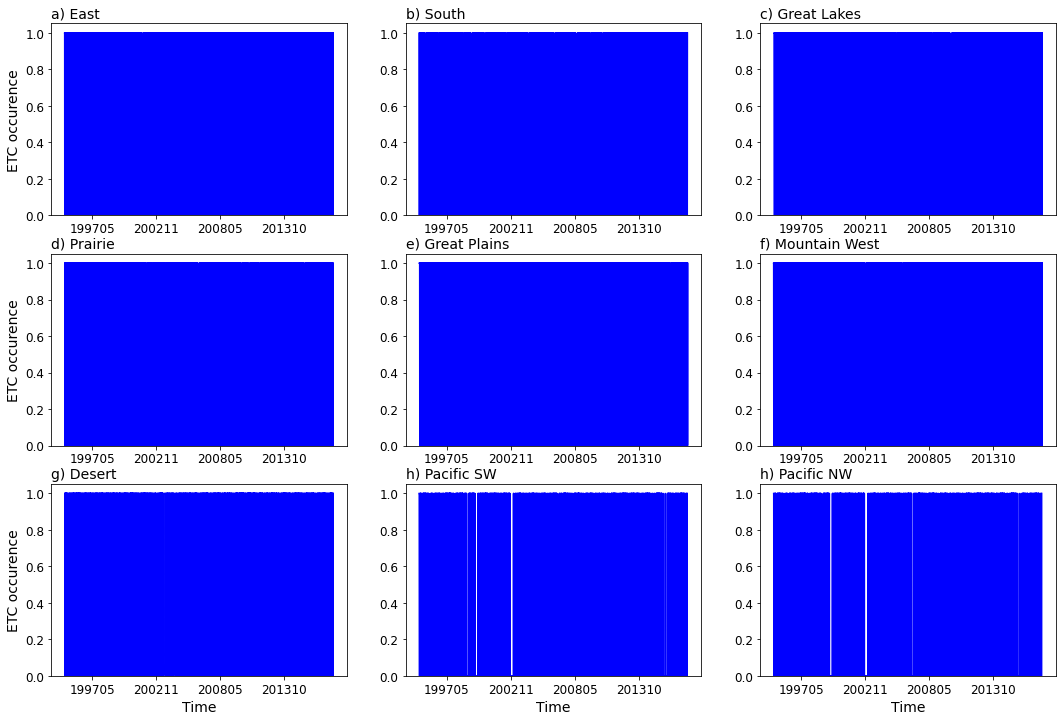

In [36]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors

fig = plt.figure(figsize = (18,12))
date_plot = matplotlib.dates.date2num(etc_east_time['Date'])
date_fmt = matplotlib.dates.DateFormatter('%Y%m')

ax1 = plt.subplot(3, 3, 1, )
ax1.plot(date_plot, etc_east_time['Pmin'], c='b')
#ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('ETC occurence', fontsize=14)
ax1.tick_params(axis='both',labelsize=12)
ax1.xaxis.set_major_formatter(date_fmt)
ax1.set_ylim(0,1.052)
ax1.set_title('a) East', loc='left', fontsize=14)

ax2 = plt.subplot(3, 3, 2,)
ax2.plot(date_plot, etc_south_time['Pmin'], c='b')
#ax2.set_xlabel('Time', fontsize=14)
#ax2.set_ylabel('TC occurence', fontsize=14)
ax2.tick_params(axis='both',labelsize=12)
ax2.xaxis.set_major_formatter(date_fmt)
ax2.set_ylim(0,1.052)
ax2.set_title('b) South', loc='left', fontsize=14)

ax3 = plt.subplot(3, 3, 3, sharex=ax1)
ax3.plot(date_plot, etc_lakes_time['Pmin'], c='b')
#ax3.set_xlabel('Time', fontsize=14)
#ax3.set_ylabel('TC occurence', fontsize=14)
ax3.tick_params(axis='both',labelsize=12)
ax3.xaxis.set_major_formatter(date_fmt)
#ax2.set_ylim(1995,2015)
ax3.set_ylim(0,1.052)
ax3.set_title('c) Great Lakes', loc='left', fontsize=14)


ax4 = plt.subplot(3, 3, 4,sharex=ax1)
ax4.plot(date_plot, etc_prr_time['Pmin'], c='b')
#ax4.set_xlabel('Time', fontsize=14)
ax4.set_ylabel('ETC occurence', fontsize=14)
ax4.tick_params(axis='both',labelsize=12)
ax4.xaxis.set_major_formatter(date_fmt)
ax4.set_ylim(0,1.052)
ax4.set_title('d) Prairie', loc='left', fontsize=14)


ax5 = plt.subplot(3, 3, 5,sharex=ax2)
ax5.plot(date_plot, etc_gp_time['Pmin'], c='b')
#ax5.set_xlabel('Time', fontsize=14)
#ax5.set_ylabel('TC occurence', fontsize=14)
ax5.tick_params(axis='both',labelsize=12)
ax5.xaxis.set_major_formatter(date_fmt)
ax5.set_ylim(0,1.052)
ax5.set_title('e) Great Plains', loc='left', fontsize=14)


ax6 = plt.subplot(3, 3, 6,sharex=ax2)
ax6.plot(date_plot, etc_mnt_time['Pmin'], c='b')
#ax6.set_xlabel('Time', fontsize=14)
#ax6.set_ylabel('TC occurence', fontsize=14)
ax6.tick_params(axis='both',labelsize=12)
ax6.xaxis.set_major_formatter(date_fmt)
ax6.set_ylim(0,1.052)
ax6.set_title('f) Mountain West', loc='left', fontsize=14)


ax7 = plt.subplot(3, 3, 7,sharex=ax2)
ax7.plot(date_plot, etc_desert_time['Pmin'], c='b')
ax7.set_xlabel('Time', fontsize=14)
ax7.set_ylabel('ETC occurence', fontsize=14)
ax7.tick_params(axis='both',labelsize=12)
ax7.xaxis.set_major_formatter(date_fmt)
ax7.set_ylim(0,1.052)
ax7.set_title('g) Desert', loc='left', fontsize=14)


ax8 = plt.subplot(3, 3, 8,sharex=ax2)
ax8.plot(date_plot, etc_pacsw_time['Pmin'], c='b')
ax8.set_xlabel('Time', fontsize=14)
#ax8.set_ylabel('TC occurence', fontsize=14)
ax8.tick_params(axis='both',labelsize=12)
ax8.xaxis.set_major_formatter(date_fmt)
ax8.set_ylim(0,1.052)
ax8.set_title('h) Pacific SW', loc='left', fontsize=14)


ax9 = plt.subplot(3, 3, 9,sharex=ax2)
ax9.plot(date_plot, etc_pacsw_time['Pmin'], c='b')
ax9.set_xlabel('Time', fontsize=14)
#ax9.set_ylabel('TC occurence', fontsize=14)
ax9.tick_params(axis='both',labelsize=12)
ax9.xaxis.set_major_formatter(date_fmt)
ax9.set_ylim(0,1.052)
ax9.set_title('h) Pacific NW', loc='left', fontsize=14)

plt.savefig('ETC_id_Bukovsky_regions_1995–2017.png', bbox_inches='tight', transparent=False, facecolor='white', dpi=250)
plt.show()